In [2]:
# numpy and pandas will be used for data simulation
import numpy as np
import pandas as pd
#matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
#yfinance will be used for iporting historical oil prices
import yfinance as yfin

In [3]:
#setting our ticker
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

#importing our data
data = ticker.history(period='5y')

In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-09 00:00:00-05:00,158.394501,158.721497,154.399994,155.210007,82016000,0.0,0.0
2020-12-10 00:00:00-05:00,154.449493,157.104996,153.800003,155.074493,60604000,0.0,0.0
2020-12-11 00:00:00-05:00,154.832993,155.933502,153.641006,155.820999,61294000,0.0,0.0
2020-12-14 00:00:00-05:00,157.149994,159.523499,156.300003,157.848495,83116000,0.0,0.0
2020-12-15 00:00:00-05:00,159.050507,159.425003,156.524506,158.255997,66390000,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-03 00:00:00-05:00,233.350006,233.380005,230.610001,232.380005,35495100,0.0,0.0
2025-12-04 00:00:00-05:00,232.770004,233.500000,226.800003,229.110001,45683200,0.0,0.0
2025-12-05 00:00:00-05:00,230.320007,231.240005,228.550003,229.529999,33117400,0.0,0.0


<Axes: xlabel='Date', ylabel='Amazon'>

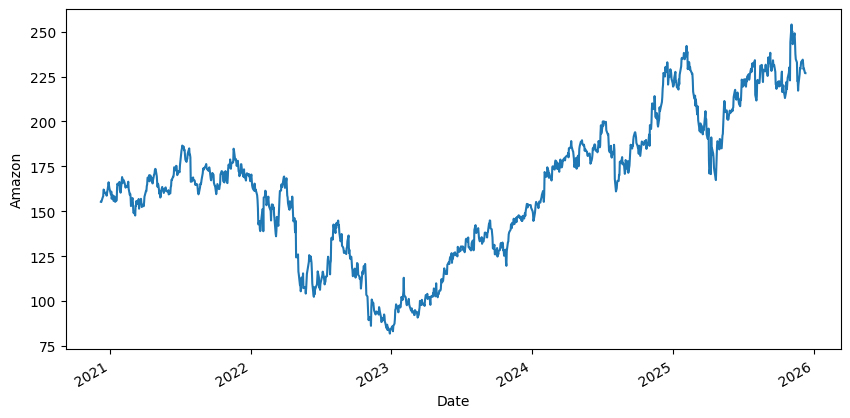

In [5]:
#settubg the text on the y axis
plt.ylabel("Amazon")

#setting the size o our graph
data['Close'].plot(figsize=(10,5))


In [6]:
#Calculate the simple saving averages (SPA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

#calculat exponetial moving averages (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0,0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI
Date,,,,,,,,,,,
2020-12-09 00:00:00-05:00,158.394501,158.721497,154.399994,155.210007,82016000,0.0,0.0,NaN,NaN,155.210007,NaN
2020-12-10 00:00:00-05:00,154.449493,157.104996,153.800003,155.074493,60604000,0.0,0.0,NaN,NaN,155.197101,NaN
2020-12-11 00:00:00-05:00,154.832993,155.933502,153.641006,155.820999,61294000,0.0,0.0,NaN,NaN,155.256520,NaN
2020-12-14 00:00:00-05:00,157.149994,159.523499,156.300003,157.848495,83116000,0.0,0.0,NaN,NaN,155.503374,NaN
2020-12-15 00:00:00-05:00,159.050507,159.425003,156.524506,158.255997,66390000,0.0,0.0,NaN,NaN,155.765529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-03 00:00:00-05:00,233.350006,233.380005,230.610001,232.380005,35495100,0.0,0.0,234.328500,227.984601,231.542065,37.604868
2025-12-04 00:00:00-05:00,232.770004,233.500000,226.800003,229.110001,45683200,0.0,0.0,233.274001,228.162600,231.310440,40.446646
2025-12-05 00:00:00-05:00,230.320007,231.240005,228.550003,229.529999,33117400,0.0,0.0,232.598501,228.390201,231.140874,43.836592


In [8]:
data = data.dropna()

In [9]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-02-22 00:00:00-05:00,160.406494,161.615997,158.613007,159.037003,70314000,0.0,0.0,164.514774,161.552590,163.514679,32.578340
2021-02-23 00:00:00-05:00,156.351501,160.236496,154.679993,159.725006,93544000,0.0,0.0,164.266025,161.642890,163.153758,29.014900
2021-02-24 00:00:00-05:00,158.337494,158.561493,156.268997,157.976501,60226000,0.0,0.0,163.849525,161.700930,162.660686,31.317783
2021-02-25 00:00:00-05:00,156.837006,158.912994,152.388000,152.858002,90676000,0.0,0.0,163.410975,161.641670,161.727097,22.248558
2021-02-26 00:00:00-05:00,154.759995,156.121994,151.835007,154.646500,85518000,0.0,0.0,163.049250,161.577630,161.052754,24.486217
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-03 00:00:00-05:00,233.350006,233.380005,230.610001,232.380005,35495100,0.0,0.0,234.328500,227.984601,231.542065,37.604868
2025-12-04 00:00:00-05:00,232.770004,233.500000,226.800003,229.110001,45683200,0.0,0.0,233.274001,228.162600,231.310440,40.446646
2025-12-05 00:00:00-05:00,230.320007,231.240005,228.550003,229.529999,33117400,0.0,0.0,232.598501,228.390201,231.140874,43.836592


In [10]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['SMA_20','SMA_50']]

# Getting the head of the data
X.head()

,SMA_20,SMA_50
Date,,
2021-02-22 00:00:00-05:00,164.514774,161.55259
2021-02-23 00:00:00-05:00,164.266025,161.64289
2021-02-24 00:00:00-05:00,163.849525,161.70093
2021-02-25 00:00:00-05:00,163.410975,161.64167
2021-02-26 00:00:00-05:00,163.049250,161.57763


In [11]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-02-22 00:00:00-05:00,159.037003
2021-02-23 00:00:00-05:00,159.725006
2021-02-24 00:00:00-05:00,157.976501
2021-02-25 00:00:00-05:00,152.858002
2021-02-26 00:00:00-05:00,154.646500


In [12]:
# Setting the training set to 80% of the data
training = 0.7
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [14]:
import numpy as np

np.random.seed(42)  # sets the seed
print(np.random.rand(3))  # always prints the same three numbers


[0.37454012 0.95071431 0.73199394]


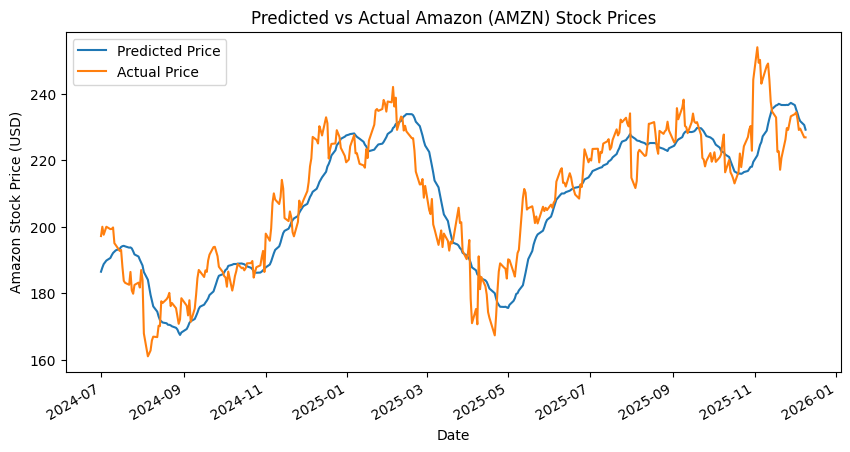

In [15]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

# Plot Predicted vs Actual Amazon Prices
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Amazon Stock Price (USD)")
plt.title("Predicted vs Actual Amazon (AMZN) Stock Prices")
plt.show()


In [16]:
# Computing the accuracy of our model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 80.40% accuracy.


In [17]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 3.7328341177657762
betas = [ 1.28456378 -0.30975161]
